In [67]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
import statistics
workload_dict = {}

workload_dict['workload_1'] = {}
workload_dict['workload_1']['date_list'] = ["20140320", "20140619", "20160121", "20180517", "20180816"]
workload_dict['workload_1']['sketch_list'] = ["CountMin"] * 6

workload_dict['workload_2'] = {}
workload_dict['workload_2']['date_list'] = ["20140320", "20140619", "20160121", "20180517", "20180816"]
workload_dict['workload_2']['sketch_list'] = ["Entropy", "CountSketch", "MRB", "MRAC", "BloomFilter", "MRB", "Entropy", "CountMin", "Kary", "MRAC"]

workload_dict['workload_3'] = {}
workload_dict['workload_3']['date_list'] = ["20140320", "20140619", "20160121", "20180517", "20180816"]
workload_dict['workload_3']['sketch_list'] = ["HLL", "HLL", "MRAC", "UnivMon", "UnivMon", "PCSA", "Entropy", "BloomFilter", "LinearCounting", "Entropy"]

workload_dict['workload_4'] = {}
workload_dict['workload_4']['date_list'] = ["20140320", "20140619", "20160121", "20180517", "20180816"]
workload_dict['workload_4']['sketch_list'] = ["MRAC", "MRB", "MRB", "HLL", "PCSA", "Entropy", "Entropy", "CountSketch", "PCSA", "HLL"]

sketch_list =[
            "LinearCounting",
            "HLL",
            "PCSA",
            "MRB",

            "CountSketch",
            "CountMin",
            "Kary",

            "Entropy",
            "UnivMon",

            "MRAC"
            ]

sketch_short_list =[
            "LC",
            "HLL",
            "PCSA",
            "MRB",

            "CS",
            "CM",
            "KARY",

            "ENT",
            "UM",

            "MRAC"
            ]

ylabel_list =[
            "Cardinality RE($\%$)",
            "Cardinality RE($\%$)",
            "Cardinality RE($\%$)",
            "Cardinality RE($\%$)",

            "ARE($\%$)",
            "ARE($\%$)",
            "ARE($\%$)",

            "Entropy RE($\%$)",
            "Entropy RE($\%$)",

            "WMRD",
            ]


In [68]:
total_list = []
tag_list = []
index = 0
for picked_sketch_name, short_name, ylabel in zip(sketch_list, sketch_short_list, ylabel_list):
    index += 1
    print(picked_sketch_name, ylabel)

    before_list = []
    after_list = []

    inst_count = 0
    for workload_name in ["workload_1", "workload_2", "workload_3", "workload_4"]:
    # for workload_name in ["workload_3", "workload_4"]:
    # for workload_name in ["workload_4"]:
        for i, sketch_name in enumerate(workload_dict[workload_name]['sketch_list'], 1):
            if sketch_name == picked_sketch_name:
                inst_name = f"inst{i}"
                inst_count += 1
                # print(workload_name, inst_name)
                for date in workload_dict[workload_name]['date_list']:
                    # before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/%s/%s/before' % (workload_name, date)
                    # after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/%s/%s/after' % (workload_name, date)
                    import os
                    before_path = os.getenv('sketch_home') + '/sketch_control_plane/SketchMD/result/%s/%s/before' % (workload_name, date)
                    after_path = os.getenv('sketch_home') + '/sketch_control_plane/SketchMD/result/%s/%s/after' % (workload_name, date)
                    pcap_dir_list = sorted(os.listdir(before_path))
                    for pcap_dir in pcap_dir_list:
                        if "pcap" not in pcap_dir:
                            continue
                        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
                        saver = PklSaver(before_pkl_path, "data.pkl")
                        before_list += saver.load()

                        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
                        saver = PklSaver(after_pkl_path, "data.pkl")
                        after_list += saver.load()
    
    total_list.append((before_list, after_list))
    tag_list.append(f"{short_name}({inst_count})")



LinearCounting Cardinality RE($\%$)
HLL Cardinality RE($\%$)
PCSA Cardinality RE($\%$)
MRB Cardinality RE($\%$)
CountSketch ARE($\%$)
CountMin ARE($\%$)
Kary ARE($\%$)
Entropy Entropy RE($\%$)
UnivMon Entropy RE($\%$)
MRAC WMRD


In [69]:
print(sketch_list)
print(len(total_list[7][0])) # before
print(len(total_list[7][1])) # after
# print(len(total_list))

['LinearCounting', 'HLL', 'PCSA', 'MRB', 'CountSketch', 'CountMin', 'Kary', 'Entropy', 'UnivMon', 'MRAC']
800
800


In [70]:
global_font_size = 14

In [71]:
def cardinality_plot(data, tag_list, ax):
    # plt.figure(figsize=(5, 3))

    values = []

    position = 0
    positions = []
    labels = []
    colors = []

    for i, v in enumerate(data):
        labels.append("%d.txt" % (i+1))
        values.append(v)
        colors.append('C'+str(int(i%2)))
        positions.append(position)
        position += 1


    box_plot_data = values
    box = ax.boxplot(box_plot_data, patch_artist=True, widths=0.4, positions=positions, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for median in box['medians']:
        median.set(color='black', linewidth=2)


    # plt.axis('off')

    # ax = plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
    ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
    ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
    ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

    ax.set_title("Cardinality", fontsize = global_font_size)
    # plt.title("Cardinality", fontsize = global_font_size)
    ax.set_ylabel("RE ($\%$)", fontsize = global_font_size)
    # plt.ylabel("RE ($\%$)", fontsize = global_font_size)
    from matplotlib.ticker import MultipleLocator
    ax.set_ylim([-0.2, 4.3])
    # plt.ylim([0, 4.5])
    ax.yaxis.set_major_locator(MultipleLocator(1))



    # if title == "LinearCounting":
    # plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
    ax.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc='center', bbox_to_anchor=(0.15,1.0), ncol=1, fontsize=13, columnspacing=0.1, handletextpad=0.25, borderpad=0.25, labelspacing=0.25)
    # 
    # 
    # plt.xticks([0.5], ["trace1"])

    ax.tick_params(labelsize=global_font_size)

    # plt.tick_params(labelsize=global_font_size)
    ax.set_xticks([0.5, 2.5, 4.5, 6.5])
    ax.set_xticklabels(tag_list)
    # plt.xticks([0.5, 2.5, 4.5, 6.5], tag_list)

    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    # ax.xaxis.grid(False)
    plt.tight_layout()
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0.2)
    # plt.show()
    # plt.close()


In [72]:
def are_plot(data, tag_list, ax):
    # plt.figure(figsize=(3.5, 3))

    values = []

    position = 0
    positions = []
    labels = []
    colors = []

    for i, v in enumerate(data):
        labels.append("%d.txt" % (i+1))
        values.append(v)
        colors.append('C'+str(int(i%2)))
        positions.append(position)
        position += 1


    box_plot_data = values
    box = ax.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for median in box['medians']:
        median.set(color='black', linewidth=2)


    # plt.axis('off')

    # ax = plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

    # plt.title("HeavyHitter, HeavyChange", fontsize = global_font_size)
    # plt.ylabel("ARE ($\%$)", fontsize = global_font_size)
    from matplotlib.ticker import MultipleLocator

    if "CS" in tag_list[0]:
        ax.set_ylabel("ARE ($\%$)", fontsize = global_font_size)
        ax.set_ylim([0, 3.75])
        ax.yaxis.set_major_locator(MultipleLocator(1))
    elif "CM" in tag_list[0]:
        ax.set_ylim([0, 7.5])
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.set_title("HeavyHitter, HeavyChange", fontsize = global_font_size)
    else:
        ax.set_ylim([0, 18.75])
        ax.yaxis.set_major_locator(MultipleLocator(5))



    # if title == "LinearCounting":
    #     plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
    # plt.xticks([0.5], ["trace1"])
    ax.tick_params(labelsize=global_font_size)
    ax.set_xticks([0.5])
    ax.set_xticklabels(tag_list)

    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    # plt.grid(color='gray', linestyle='--', linewidth=1)
    # ax.xaxis.grid(False)
    plt.tight_layout()
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0.2)
    # plt.show()
    # plt.close()


In [73]:
def ent_plot(data, tag_list, ax):
    # plt.figure(figsize=(3.5, 3))

    values = []

    position = 0
    positions = []
    labels = []
    colors = []

    for i, v in enumerate(data):
        labels.append("%d.txt" % (i+1))
        values.append(v)
        colors.append('C'+str(int(i%2)))
        positions.append(position)
        position += 1


    box_plot_data = values
    box = ax.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for median in box['medians']:
        median.set(color='black', linewidth=2)


    # plt.axis('off')

    # ax = plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

    # plt.title("Entropy", fontsize = global_font_size)
    # plt.ylabel("RE ($\%$)", fontsize = global_font_size)
    from matplotlib.ticker import MultipleLocator
    # plt.ylim([0, 33])

    if "ENT" in tag_list[0]:
        ax.set_ylabel("RE ($\%$)", fontsize = global_font_size)
        ax.set_ylim([-2.5, 42.5])
        ax.yaxis.set_major_locator(MultipleLocator(10))
        ax.set_title("Entropy", fontsize = global_font_size, x=1.2)
        print(len(box_plot_data))
        print(len(box_plot_data[0][700:]))
        print(box_plot_data[0][700:])

        print(len(box_plot_data[1][700:]))
        print(box_plot_data[1][700:])
    else:
        ax.set_ylim([-1, 17])
        ax.yaxis.set_major_locator(MultipleLocator(4))

    # plt.ylim([0, 14])
    # ax.yaxis.set_major_locator(MultipleLocator(3))



    # if title == "LinearCounting":
    #     plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
    # plt.xticks([0.5], ["trace1"])
    ax.tick_params(labelsize=global_font_size)
    # plt.tick_params(labelsize=global_font_size)
    # ax.set_xticks([0.5, 2.5])
    ax.set_xticks([0.5])
    ax.set_xticklabels(tag_list)
    # plt.xticks([0.5, 2.5], tag_list)

    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    # plt.grid(color='gray', linestyle='--', linewidth=1)
    # ax.xaxis.grid(False)
    plt.tight_layout()
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0.2)
    # plt.show()
    # plt.close()



In [74]:
def mrac_plot(data, tag_list, ax):
    # plt.figure(figsize=(3.5, 3))

    values = []

    position = 0
    positions = []
    labels = []
    colors = []

    for i, v in enumerate(data):
        labels.append("%d.txt" % (i+1))
        values.append(v)
        colors.append('C'+str(int(i%2)))
        positions.append(position)
        position += 1


    box_plot_data = values
    box = ax.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for median in box['medians']:
        median.set(color='black', linewidth=2)


    # plt.axis('off')

    # ax = plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

    ax.set_title("Flow Size Dist", fontsize = global_font_size)
    ax.set_ylabel("WMRD", fontsize = global_font_size)
    # plt.title("Flow Size Dist", fontsize = global_font_size)
    # plt.ylabel("WMRD", fontsize = global_font_size)
    from matplotlib.ticker import MultipleLocator
    # ax.set_ylim([0.3, 0.65])
    # plt.ylim([0.3, 0.65])
    # ax.yaxis.set_major_locator(MultipleLocator(0.1))

    # ax.set_ylim([0, 1])
    ax.set_ylim([0.2, 0.9])
    ax.yaxis.set_major_locator(MultipleLocator(0.2))



    # if title == "LinearCounting":
    #     plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
    # plt.xticks([0.5], ["trace1"])
    ax.tick_params(labelsize=global_font_size)
    # plt.tick_params(labelsize=global_font_size)
    ax.set_xticks([0.5])
    ax.set_xticklabels(tag_list)
    # plt.xticks([0.5], tag_list)

    ax.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    # plt.grid(color='gray', linestyle='--', linewidth=1)
    # ax.xaxis.grid(False)
    plt.tight_layout()
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0.2)
    # plt.show()
    # plt.close()



/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


2
100
[24.902237442471563, 24.207868176596534, 25.000498523210545, 24.24775022883115, 25.019718542392127, 24.381255998858126, 24.839113150645503, 24.360214226127052, 25.029555450805162, 24.361962515369587, 25.269784270783546, 24.573530109786653, 25.424669582058574, 24.94542923976558, 25.557647771844472, 23.83827763235212, 23.96266893438415, 23.989161232496777, 24.31511219391764, 23.548017248682495, 26.003815623847476, 25.68728174812821, 26.383838997270903, 25.86791290512339, 26.661091176822637, 25.9919160908413, 26.29794575533469, 25.82192702802331, 26.54652369867161, 25.797804261588, 26.674633276689296, 26.106221444802546, 26.654915313390525, 25.845368528367857, 26.507229351876788, 25.62377576921489, 26.418884678967373, 25.652647672548873, 26.511686209449458, 26.091745692447503, 24.10770504119301, 23.888972227022638, 23.38020244647516, 23.471461581522043, 23.644077431216378, 23.493164087923578, 23.796455986437458, 23.99681812901883, 24.050133481698726, 23.3837115173538, 23.47152119959

/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/home/hnamkung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec w

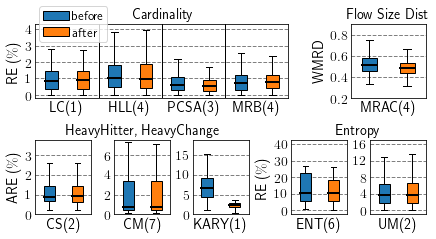

In [75]:
fig = plt.figure(figsize=(7, 3.5), constrained_layout=True)

ax1 = plt.subplot2grid(shape=(10, 20), loc=(0, 0), colspan=13, rowspan=4)
ax2 = plt.subplot2grid(shape=(10, 20), loc=(0, 16), colspan=4, rowspan=4)

ax3 = plt.subplot2grid(shape=(10, 20), loc=(6, 0), colspan=3, rowspan=4)
ax4 = plt.subplot2grid(shape=(10, 20), loc=(6, 4), colspan=3, rowspan=4)
ax5 = plt.subplot2grid(shape=(10, 20), loc=(6, 8), colspan=3, rowspan=4)
ax6 = plt.subplot2grid(shape=(10, 20), loc=(6, 13), colspan=3, rowspan=4)
ax7 = plt.subplot2grid(shape=(10, 20), loc=(6, 17), colspan=3, rowspan=4)


data = []
for entry in total_list[0:4]:
    data.append(entry[0])
    data.append(entry[1])
cardinality_plot(data, tag_list[0:4], ax1 )

data = []
for entry in total_list[4:5]:
    data.append(entry[0])
    data.append(entry[1])
are_plot(data, tag_list[4:5], ax3)

data = []
for entry in total_list[5:6]:
    data.append(entry[0])
    data.append(entry[1])
are_plot(data, tag_list[5:6], ax4)

data = []
for entry in total_list[6:7]:
    data.append(entry[0])
    data.append(entry[1])
are_plot(data, tag_list[6:7], ax5)


data = []
for entry in total_list[7:8]:
    data.append(entry[0])
    data.append(entry[1])
ent_plot(data, tag_list[7:8], ax6)

data = []
for entry in total_list[8:9]:
    data.append(entry[0])
    data.append(entry[1])
ent_plot(data, tag_list[8:9], ax7)


data = []
for entry in total_list[9:10]:
    data.append(entry[0])
    data.append(entry[1])
mrac_plot(data, tag_list[9:10], ax2)

# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
file_name = 'overall_accuracy.pdf'
latex_path = "."
# file_name = 'overall_accuracy_after_34.png'
import os
full_path = os.path.join(latex_path, file_name)
plt.tight_layout()
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.2)
plt.show()

# plt.subplot(1, 10, index)
    # bar_plot(before_list, after_list, picked_sketch_name, f"{short_name} ({inst_count})", ylabel)

# plt.tight_layout()


In [76]:
# # fig = plt.figure()
# # fig.set_figwidth(6)
# # fig.set_figheight(4)

# fig = plt.figure(figsize=(7, 3.5), constrained_layout=True)

# # ax1 = plt.subplot2grid(shape=(2, 5), loc=(0, 0), colspan=4)
# # ax2 = plt.subplot2grid(shape=(2, 5), loc=(0, 4), colspan=1)
# # ax3 = plt.subplot2grid(shape=(2, 5), loc=(1, 0), colspan=3)
# # ax4 = plt.subplot2grid(shape=(2, 5), loc=(1, 3), colspan=2)

# # ax1 = plt.subplot2grid(shape=(2, 10), loc=(0, 0), colspan=7)
# # ax2 = plt.subplot2grid(shape=(2, 10), loc=(0, 7), colspan=3)
# # ax3 = plt.subplot2grid(shape=(2, 10), loc=(1, 0), colspan=6)
# # ax4 = plt.subplot2grid(shape=(2, 10), loc=(1, 6), colspan=4)


# ax1 = plt.subplot2grid(shape=(10, 20), loc=(0, 0), colspan=13, rowspan=4)
# ax2 = plt.subplot2grid(shape=(10, 20), loc=(0, 16), colspan=4, rowspan=4)


# ax3 = plt.subplot2grid(shape=(10, 20), loc=(6, 0), colspan=10, rowspan=4)
# ax4 = plt.subplot2grid(shape=(10, 20), loc=(6, 13), colspan=7, rowspan=4)


# # plt.subplot(1, 4, 1)

# data = []
# for entry in total_list[0:4]:
#     data.append(entry[0])
#     data.append(entry[1])
# cardinality_plot(data, tag_list[0:4], ax1 )

# # plt.subplot(1, 4, 2)

# data = []
# for entry in total_list[4:7]:
#     data.append(entry[0])
#     data.append(entry[1])
# are_plot(data, tag_list[4:7], ax3)

# # plt.subplot(1, 4, 3)

# data = []
# for entry in total_list[7:9]:
#     data.append(entry[0])
#     data.append(entry[1])
# ent_plot(data, tag_list[7:9], ax4)

# # plt.subplot(1, 4, 4)

# data = []
# for entry in total_list[9:10]:
#     data.append(entry[0])
#     data.append(entry[1])
# mrac_plot(data, tag_list[9:10], ax2)

# # latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
# latex_path = "."
# file_name = 'overall_accuracy.png'
# # file_name = 'overall_accuracy.pdf'
# import os
# full_path = os.path.join(latex_path, file_name)
# plt.tight_layout()
# plt.savefig(full_path, bbox_inches='tight', pad_inches=0.2)
# plt.show()

# # plt.subplot(1, 10, index)
#     # bar_plot(before_list, after_list, picked_sketch_name, f"{short_name} ({inst_count})", ylabel)

# # plt.tight_layout()


In [77]:
# from matplotlib import gridspec

# plt.figure(figsize=(14, 2.3))
# gs = gridspec.GridSpec(nrows=1,
#                        ncols=4,
#                        height_ratios=[1], 
#                        width_ratios=[4, 3, 2, 1]
#                       )


# # plt.subplot(1, 4, 1)

# data = []
# for entry in total_list[0:4]:
#     data.append(entry[0])
#     data.append(entry[1])
# cardinality_plot(data, tag_list[0:4], plt.subplot(gs[0]) )

# # plt.subplot(1, 4, 2)

# data = []
# for entry in total_list[4:7]:
#     data.append(entry[0])
#     data.append(entry[1])
# are_plot(data, tag_list[4:7], plt.subplot(gs[1]))

# # plt.subplot(1, 4, 3)

# data = []
# for entry in total_list[7:9]:
#     data.append(entry[0])
#     data.append(entry[1])
# ent_plot(data, tag_list[7:9], plt.subplot(gs[2]))

# # plt.subplot(1, 4, 4)

# data = []
# for entry in total_list[9:10]:
#     data.append(entry[0])
#     data.append(entry[1])
# mrac_plot(data, tag_list[9:10], plt.subplot(gs[3]))

# plt.tight_layout()
# # latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
# latex_path = "."
# file_name = 'overall_accuracy.png'
# import os
# full_path = os.path.join(latex_path, file_name)
# plt.savefig(full_path, bbox_inches='tight', pad_inches=0.2)
# plt.show()

# # plt.subplot(1, 10, index)
#     # bar_plot(before_list, after_list, picked_sketch_name, f"{short_name} ({inst_count})", ylabel)

# # plt.tight_layout()
